In [1]:
%load_ext autoreload
%autoreload 2

import helper
import pandas as pd

C:\Users\User\miniconda3\envs\pytorch\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


### Driver Code

In [2]:
helper.__init()

Misc Folder located!
Plots Folder located!


In [3]:
df = helper.fetch_data_from_database(table='mobility_stats_apple', where_column='region', where_value='Greece')

Creating connection to the PostgreSQL database...
Opening connection...
Data Fetched


In [4]:
df = helper.clean_df(df)


Checking for null columns...
-- Dropped null column: transit

Clearing null rows...


In [9]:
df['day_name'] = df['date'].dt.day_name()
day_by_day_trends = df.groupby(by='day_name').mean().reset_index()

day_by_day_trends.sort_values('day_name', inplace=True)

In [ ]:
df_corr = df.corr(method='spearman').iloc[1:, 1:]
labels = np.where(
    np.abs(df_corr) > 0.80, "S", 
    np.where(np.abs(df_corr) > 0.55, "M",
             np.where(
                 np.abs(df_corr) > 0.30, "W", ""
             )))    

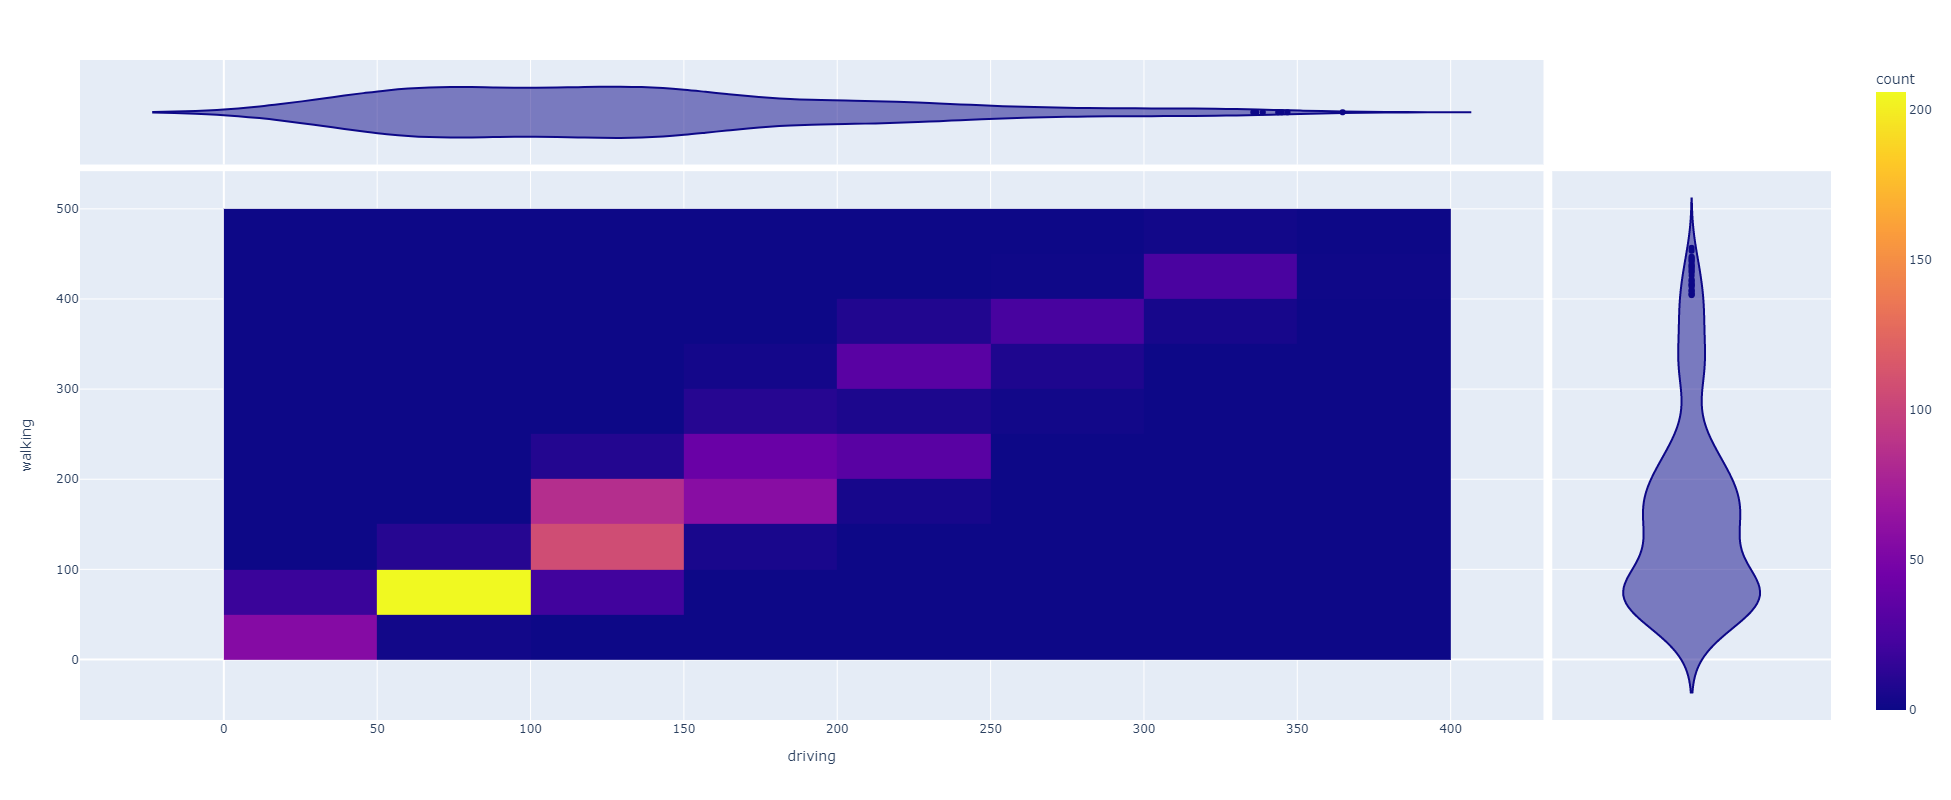

In [8]:
fig = helper.px.density_heatmap(
    data_frame=df,
    x='driving',
    y='walking',
    marginal_x="violin",
    marginal_y="violin",
    width=800,
    height=800
)

fig.show()
